### Plot _thornado_ data

Notebook for quick plotting of 1D _thornado_ data. 

---

To Do:  

* Make it easier to select what to plot. Currently: Very Manual 
* Want easier use for data from multiple runs

In [1]:
import h5py    
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib ipympl

In [2]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['legend.handlelength']=4
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['ytick.minor.visible']=True
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['xtick.labelsize']   = 14
mpl.rcParams['ytick.labelsize']   = 14

Data Directory. Simply change `simName` to the desired simulation. Later will likely have to modify.

In [3]:
simName = "Sod"
simType = "nuclear" #Currently: "ideal" or "nuclear"
sim = "highDens_new" #The desired run
sim_cw  = "highDens_cw_new"
sim_ref = "highDens_reference"

#sim_an = "analytic_nNodes1" #Analytic, for comparison
fields = [ 'uAF_P', 'uAF_Ye', 'uPF_V1', 'uCF_D', 'uCF_Ne' ]

dataDir = "../../data/" + simName + "/" + simType + "/" + sim
dataDir_cw = "../../data/" + simName + "/" + simType + "/" + sim_cw 
dataDir_ref = "../../data/" + simName + "/" + simType + "/" + sim_ref 


Setup figure directory

In [4]:
figDir = "../figures/"

For now, manually specify the `fileNumber`. Possibly add in ways to automatically get the max.

In [6]:
fileNumber = "000600"
#fileName = dataDir + '/' + simName + '_FluidFields_' + fileNumber + '.h5' 
fileName = dataDir + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5' 
fileNumber = "000600"
fileName_cw  = dataDir_cw + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5'
fileNumber = "000301"
fileName_ref  = dataDir_ref + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5'

mb = 1.660539 * pow(10,-24)

Read the Data

In [7]:
with h5py.File(fileName, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1 = f['/Spatial Grid/X1'][:]
    
    uAF_P  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Ye = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]
    
    uPF_V1 = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    
    uCF_D = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    data = {}
    data['x1'] = x1[:]
    data[fields[0]] = uAF_P[0][0][:]
    data[fields[1]] = mb * uCF_Ne[0][0][:] / uCF_D[0][0][:]#uAF_Ye[0][0][:]
    data[fields[2]] = uPF_V1[0][0][:]
    data[fields[3]] = uCF_D[0][0][:]
    data[fields[4]] = uCF_Ne[0][0][:]  
    
    print("Time:", float(time), "ms")
    
### With componentwise limiting    
with h5py.File(fileName_cw, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1_cw = f['/Spatial Grid/X1'][:]
    x2 = f['/Spatial Grid/X2'][:]
    x3 = f['/Spatial Grid/X3'][:]
    
    uAF_P_cw  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_T_cw = f['/Fluid Fields/Auxiliary/Temperature'][:]
    uAF_Ye_cw = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]
    
    uPF_V1_cw  = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    
    uCF_D_cw  = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne_cw  = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    print("Time:", float(time), "ms")   
              
    data_cw = {}
    data_cw['x1'] = x1[:]
    data_cw[fields[0]] = uAF_P_cw[0][0][:]
    data_cw[fields[1]] = mb * uCF_Ne_cw[0][0][:] / uCF_D_cw[0][0][:]#uAF_Ye[0][0][:]
    data_cw[fields[2]] = uPF_V1_cw[0][0][:]
    data_cw[fields[3]] = uCF_D_cw[0][0][:]
    data_cw[fields[4]] = uCF_Ne_cw[0][0][:]          
    
### With componentwise limiting    
with h5py.File(fileName_ref, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1_ref = f['/Spatial Grid/X1'][:]
    
    uAF_P_ref  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Ye_ref = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]
    
    uPF_V1_ref  = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    
    uCF_D_ref  = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne_ref  = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    print("Time:", float(time), "ms")   
              
    data_ref = {}
    data_ref['x1'] = x1_ref[:]
    data_ref[fields[0]] = uAF_P_ref[0][0][:]
    data_ref[fields[1]] = mb * uCF_Ne_ref[0][0][:] / uCF_D_ref[0][0][:]#uAF_Ye[0][0][:]
    data_ref[fields[2]] = uPF_V1_ref[0][0][:]
    data_ref[fields[3]] = uCF_D_ref[0][0][:]
    data_ref[fields[4]] = uCF_Ne_ref[0][0][:]   

Fluid Fields
Spatial Grid
Time
Time: 0.075 ms
Fluid Fields
Spatial Grid
Time
Time: 0.075 ms
Fluid Fields
Shock Detector
Spatial Grid
Time
Time: 0.075 ms


Read the desired fields into a python dictionary.

Compute Cell Averages

In [8]:
nNodes = 3
wG = [ 5.0/(1*18.0), 8.0/(1*18.0), 5.0/(1*18.0) ]
N_N = len(x1)

N_K = N_N / nNodes

data_avg = {}    
data_avg['x1'] = np.zeros(int(N_K))
for i in range(len(fields)):
    data_avg[fields[i]] = np.zeros(int(N_K))        
    for j in range(int(N_K)):
        data_avg['x1'][j] = (np.sum( wG * data['x1'][(j)*nNodes:(j+1)*nNodes] ))
        data_avg[fields[i]][j] = np.sum( wG * data[fields[i]][(j)*nNodes:(j+1)*nNodes] )  
        
data_cw_avg = {}    
data_cw_avg['x1'] = np.zeros(int(N_K))
for i in range(len(fields)):
    data_cw_avg[fields[i]] = np.zeros(int(N_K))      
    for j in range(int(N_K)):
        data_cw_avg['x1'][j] = (np.sum( wG * data_cw['x1'][(j)*nNodes:(j+1)*nNodes] ))
        data_cw_avg[fields[i]][j] = np.sum( wG * data_cw[fields[i]][(j)*nNodes:(j+1)*nNodes] )   
        
data_ref_avg = {}    
data_ref_avg['x1'] = np.zeros(int(N_K))
for i in range(len(fields)):
    data_cw_avg[fields[i]] = np.zeros(int(N_K))      
    for j in range(int(N_K)):
        data_cw_avg['x1'][j] = (np.sum( wG * data_cw['x1'][(j)*nNodes:(j+1)*nNodes] ))
        data_cw_avg[fields[i]][j] = np.sum( wG * data_cw[fields[i]][(j)*nNodes:(j+1)*nNodes] )       

Plot! 

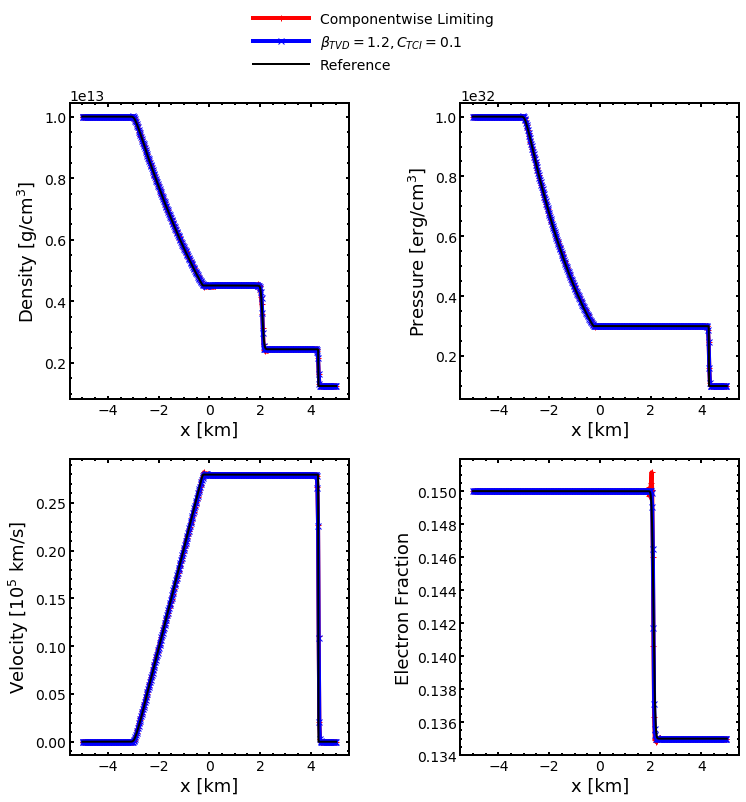

In [13]:
fig, cax = plt.subplots(2,2, sharex=False,figsize=(12,12))
fig.subplots_adjust(hspace=.2, wspace=0.4)
# ---
cax[0,0].plot(data_cw_avg['x1'], data_cw_avg['uCF_D'], label="Componentwise Limiting",marker="+",color="red")
cax[0,0].plot(data_avg['x1'],data_avg['uCF_D'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.2, C_{TCI}=0.1$")
cax[0,0].plot(x1_ref,data_ref['uCF_D'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[0,0].set(xlabel="x [km]",ylabel = r'Density [g/cm$^3$]')
#cax[0,0].set_title("Sod Shock Tube (t = 0.025ms)")
# ---

cax[0,1].plot(data_cw_avg['x1'], data_cw_avg['uAF_P'], label="Componentwise Limiting",marker="+",color="red")
cax[0,1].plot(data_avg['x1'],data_avg['uAF_P'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.2, C_{TCI}=0.1$")
cax[0,1].plot(x1_ref,data_ref['uAF_P'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[0,1].set(xlabel="x [km]",ylabel = r'Pressure [erg/cm$^3$]')
# --- 
# generate 2 2d grids for the x & y bounds

cax[1,0].plot(data_cw_avg['x1'], data_cw_avg['uPF_V1']/(10**5), label="Componentwise Limiting",marker="+",color="red")
cax[1,0].plot(data_avg['x1'],data_avg['uPF_V1']/(10**5),marker='x',color='blue',label=r"$\beta_{TVD} = 1.2, C_{TCI}=0.1$")
cax[1,0].plot(x1_ref,data_ref['uPF_V1']/(10**5), linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[1,0].set(xlabel="x [km]",ylabel = r'Velocity [$10^{5}$ km/s]')
# ---
cax[1,1].plot(data_cw_avg['x1'], data_cw_avg['uAF_Ye'], label="Componentwise Limiting",marker="+",color="red")
cax[1,1].plot(data_avg['x1'],data_avg['uAF_Ye'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.2, C_{TCI}=0.1$")
cax[1,1].plot(x1_ref,data_ref['uAF_Ye'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[1,1].set(xlabel="x [km]",ylabel = r'Electron Fraction')
#cax[1,1].yaxis.tick_right()
#cax[1,1].yaxis.set_label_position("right")

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# axins = zoomed_inset_axes(cax[1,1], 2.5, loc=3) # zoom-factor: 2.5, location: upper-left
# axins.plot(data_cw_avg['x1'], data_cw_avg['uAF_Ye'], label="Componentwise Limiting",marker="+",color="red")
# axins.plot(data_avg['x1'],data_avg['uAF_Ye'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.2, C_{TCI}=0.1$")
# axins.plot(x1_ref,data_ref['uAF_Ye'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
# x1, x2, y1, y2 = 1.15, 2.5, 0.148, 0.1515 # specify the limits
# axins.set_xlim(x1, x2) # apply the x-limits
# axins.set_ylim(y1, y2) # apply the y-limits

# axins.xaxis.set_visible(False)
# axins.yaxis.set_visible(False)

# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(cax[1,1], axins, loc1=2, loc2=1, fc="none", ec="0.5")

# axins2 = zoomed_inset_axes(cax[1,1], 2.5, loc=1) # zoom-factor: 2.5, location: upper-left
# axins2.plot(data_cw_avg['x1'], data_cw_avg['uAF_Ye'], label="Componentwise Limiting",marker="+",color="red")
# axins2.plot(data_avg['x1'],data_avg['uAF_Ye'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.2, C_{TCI}=0.1$")
# axins2.plot(x1_ref,data_ref['uAF_Ye'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
# x1, x2, y1, y2 = 2.0, 3.0, 0.1335, 0.136 # specify the limits
# axins2.set_xlim(x1, x2) # apply the x-limits
# axins2.set_ylim(y1, y2) # apply the y-limits

# axins2.xaxis.set_visible(False)
# axins2.yaxis.set_visible(False)

# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(cax[1,1], axins2, loc1=2, loc2=4, fc="none", ec="0.5")

handles, labels = cax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.savefig('../figures/highDens.png', dpi=200, bbox_inches='tight')